In [30]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

<b>Import Data From 2021 World Happiness Report <b>

In [31]:
url = "https://happiness-report.s3.amazonaws.com/2021/DataForFigure2.1WHR2021C2.xls"
happiness = pd.read_excel(url)

In [32]:
# focusing on a select few columns
happiness = happiness[happiness.columns[[0, 2, 13, 14, 15, 16, 17, 18]]]

happiness.loc[:, "Overall rank"] = range(1, len(happiness)+1)

cols = [c.replace("Explained by: ", "") for c in happiness.columns]
cols[0] = "Country or region"
cols[1] = "Score"
cols[2] = "GDP per capita"
happiness = happiness.rename(columns= dict(zip(happiness.columns, cols)))

cols = ["Overall rank"] + cols[:-1]
happiness = happiness[cols]

happiness.to_csv('happiness_report_2021.csv', header=True)

<b> Happiness Relationship to Life Expectancy <b>

[Text(0, 0.5, 'Healthy Life Expectancy'), Text(0.5, 0, 'Score')]

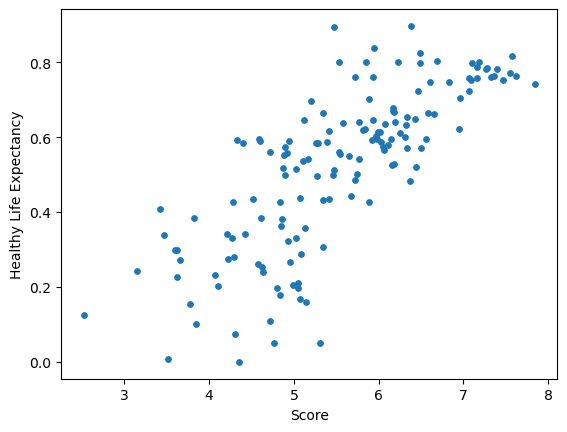

In [33]:
fig,ax=plt.subplots(1)
ax.scatter(happiness["Score"],happiness["Healthy life expectancy"],s=15)
ax.set(ylabel="Healthy Life Expectancy",xlabel="Score")

There is a positive correlation between life expectancy and happiness score. As high life expectancy goes up, the happiness score tends to go up as well.

In [34]:
def scatterplot_matrix(cols, figsize):
    """
    Create a grid of scatterplots between each pair of the specified columns in the happine
    data set.
    cols: a list of column names in the happiness data set. Only these columns will be plo
    figsize: the desired dimensions of the figure.
    """
    arg=figsize
    size=len(cols)
    fig,ax=plt.subplots(size,size,figsize=arg)
    for i,name in enumerate(cols):
        for j,name2 in enumerate(cols):
            if name!=name2:
                ax[i][j].scatter(happiness[name],happiness[name2],s=10)
                my_number=np.corrcoef(x=happiness[name],y=happiness[name2])[0][1]
                ax[i][j].set(xlabel=r"$\rho$ = " + str(np.round(my_number, 2)),title=name,ylabel =name2)
    plt.tight_layout()

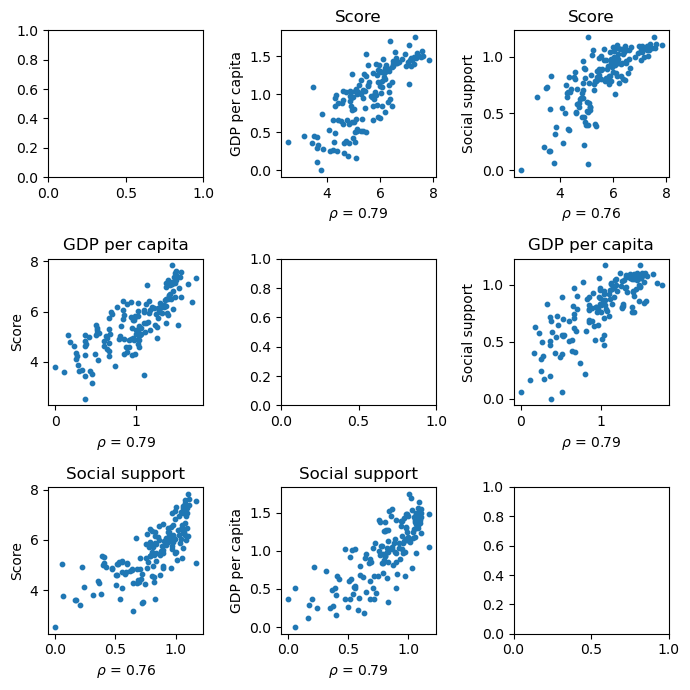

In [35]:
cols = ["Score", "GDP per capita", "Social support"]
scatterplot_matrix(cols,figsize=(7,7))

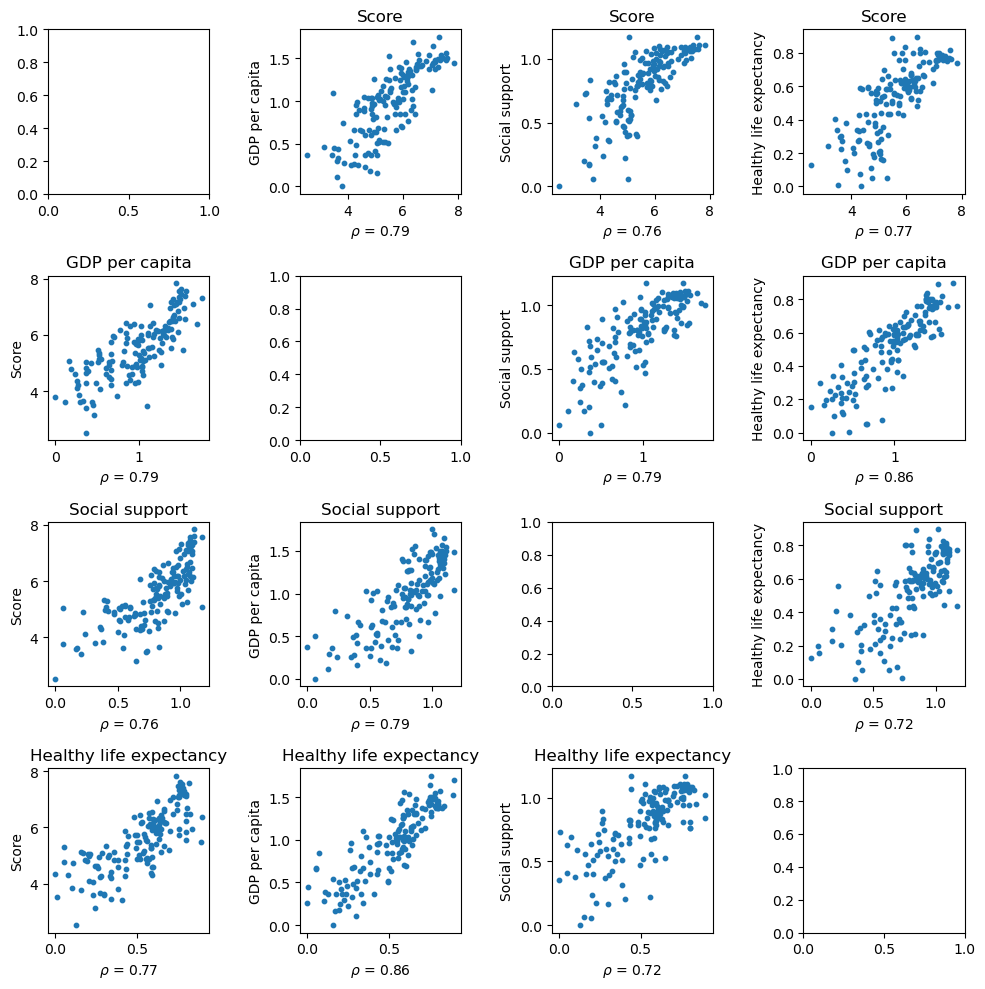

In [36]:
cols = ["Score", "GDP per capita", "Social support","Healthy life expectancy"]
scatterplot_matrix(cols,figsize=(10,10))

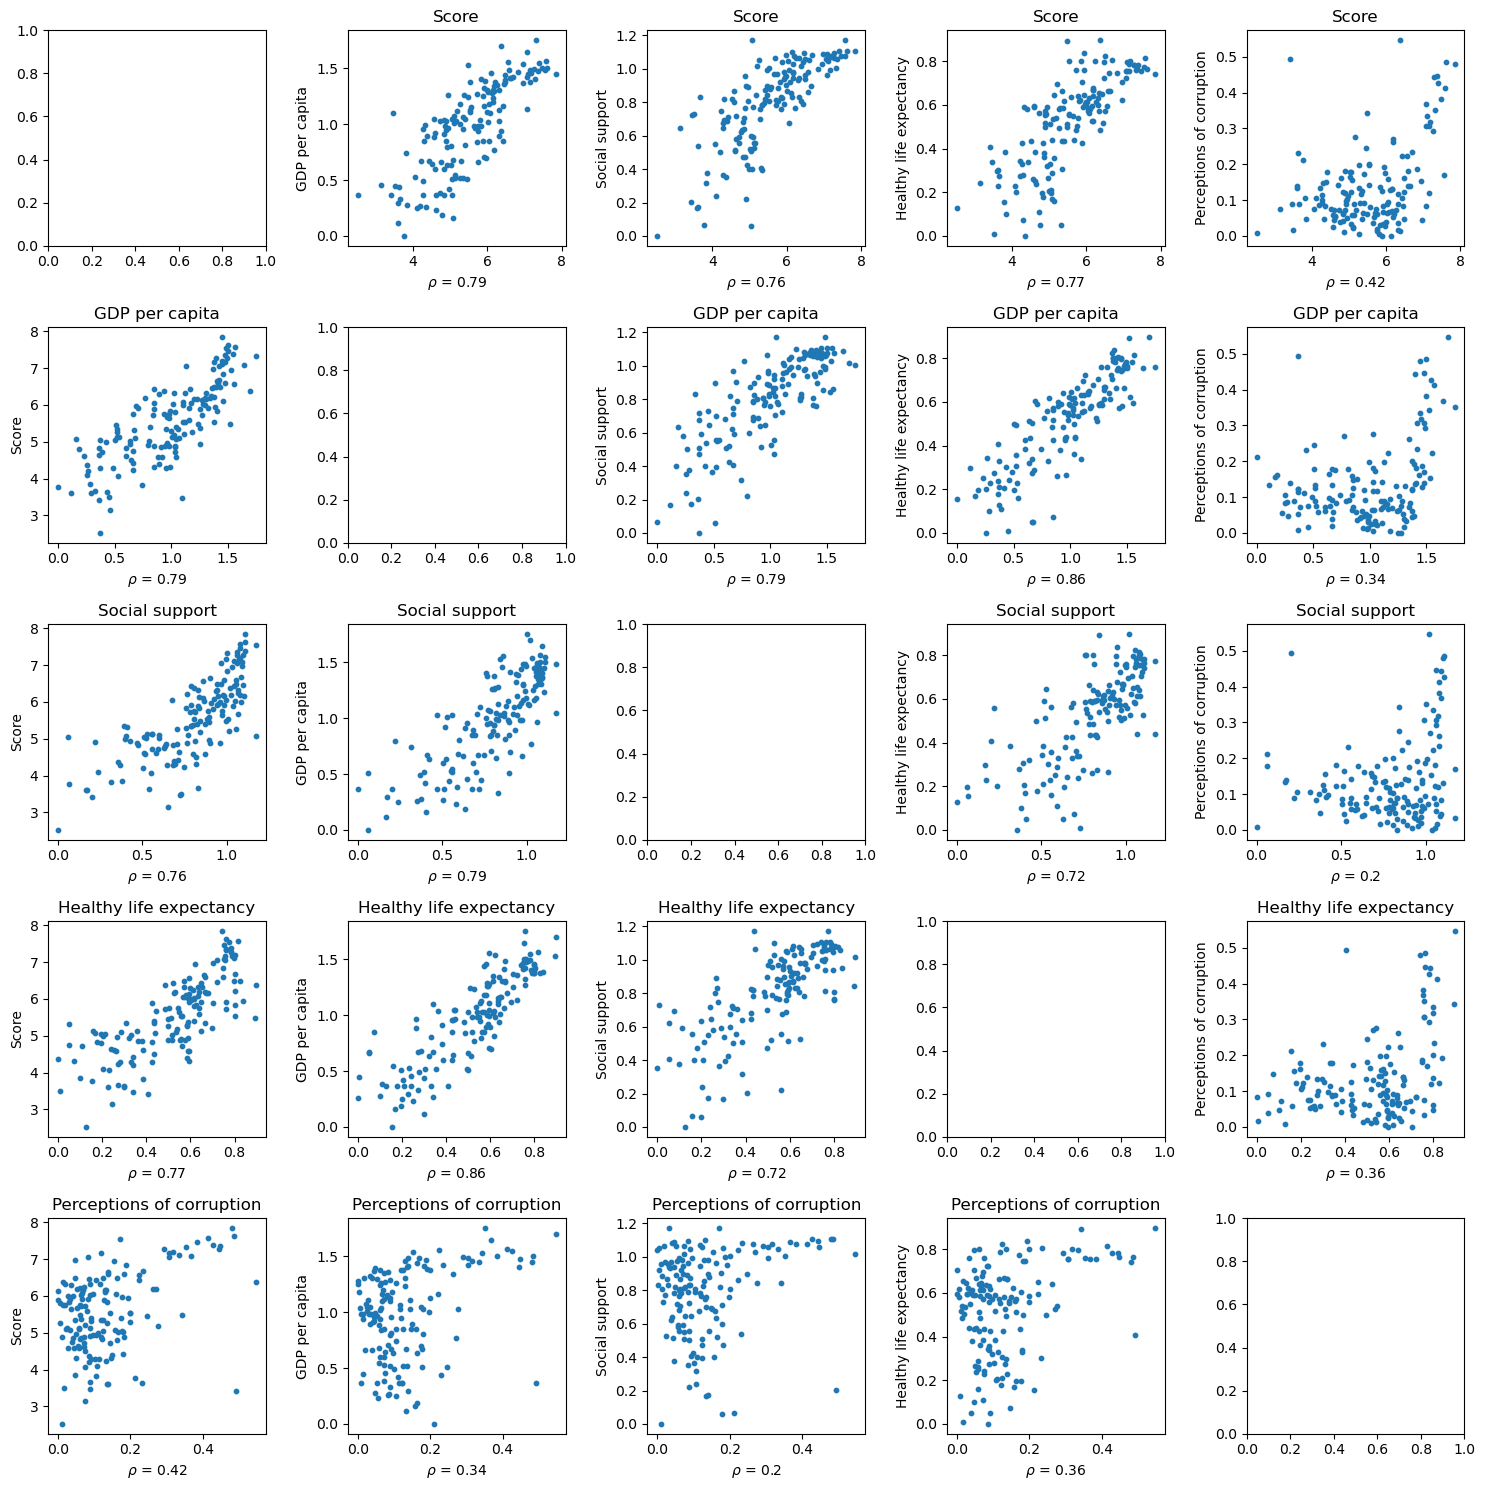

In [37]:
cols = ["Score", "GDP per capita", "Social support","Healthy life expectancy","Perceptions of corruption"]
scatterplot_matrix(cols,figsize=(15,15))

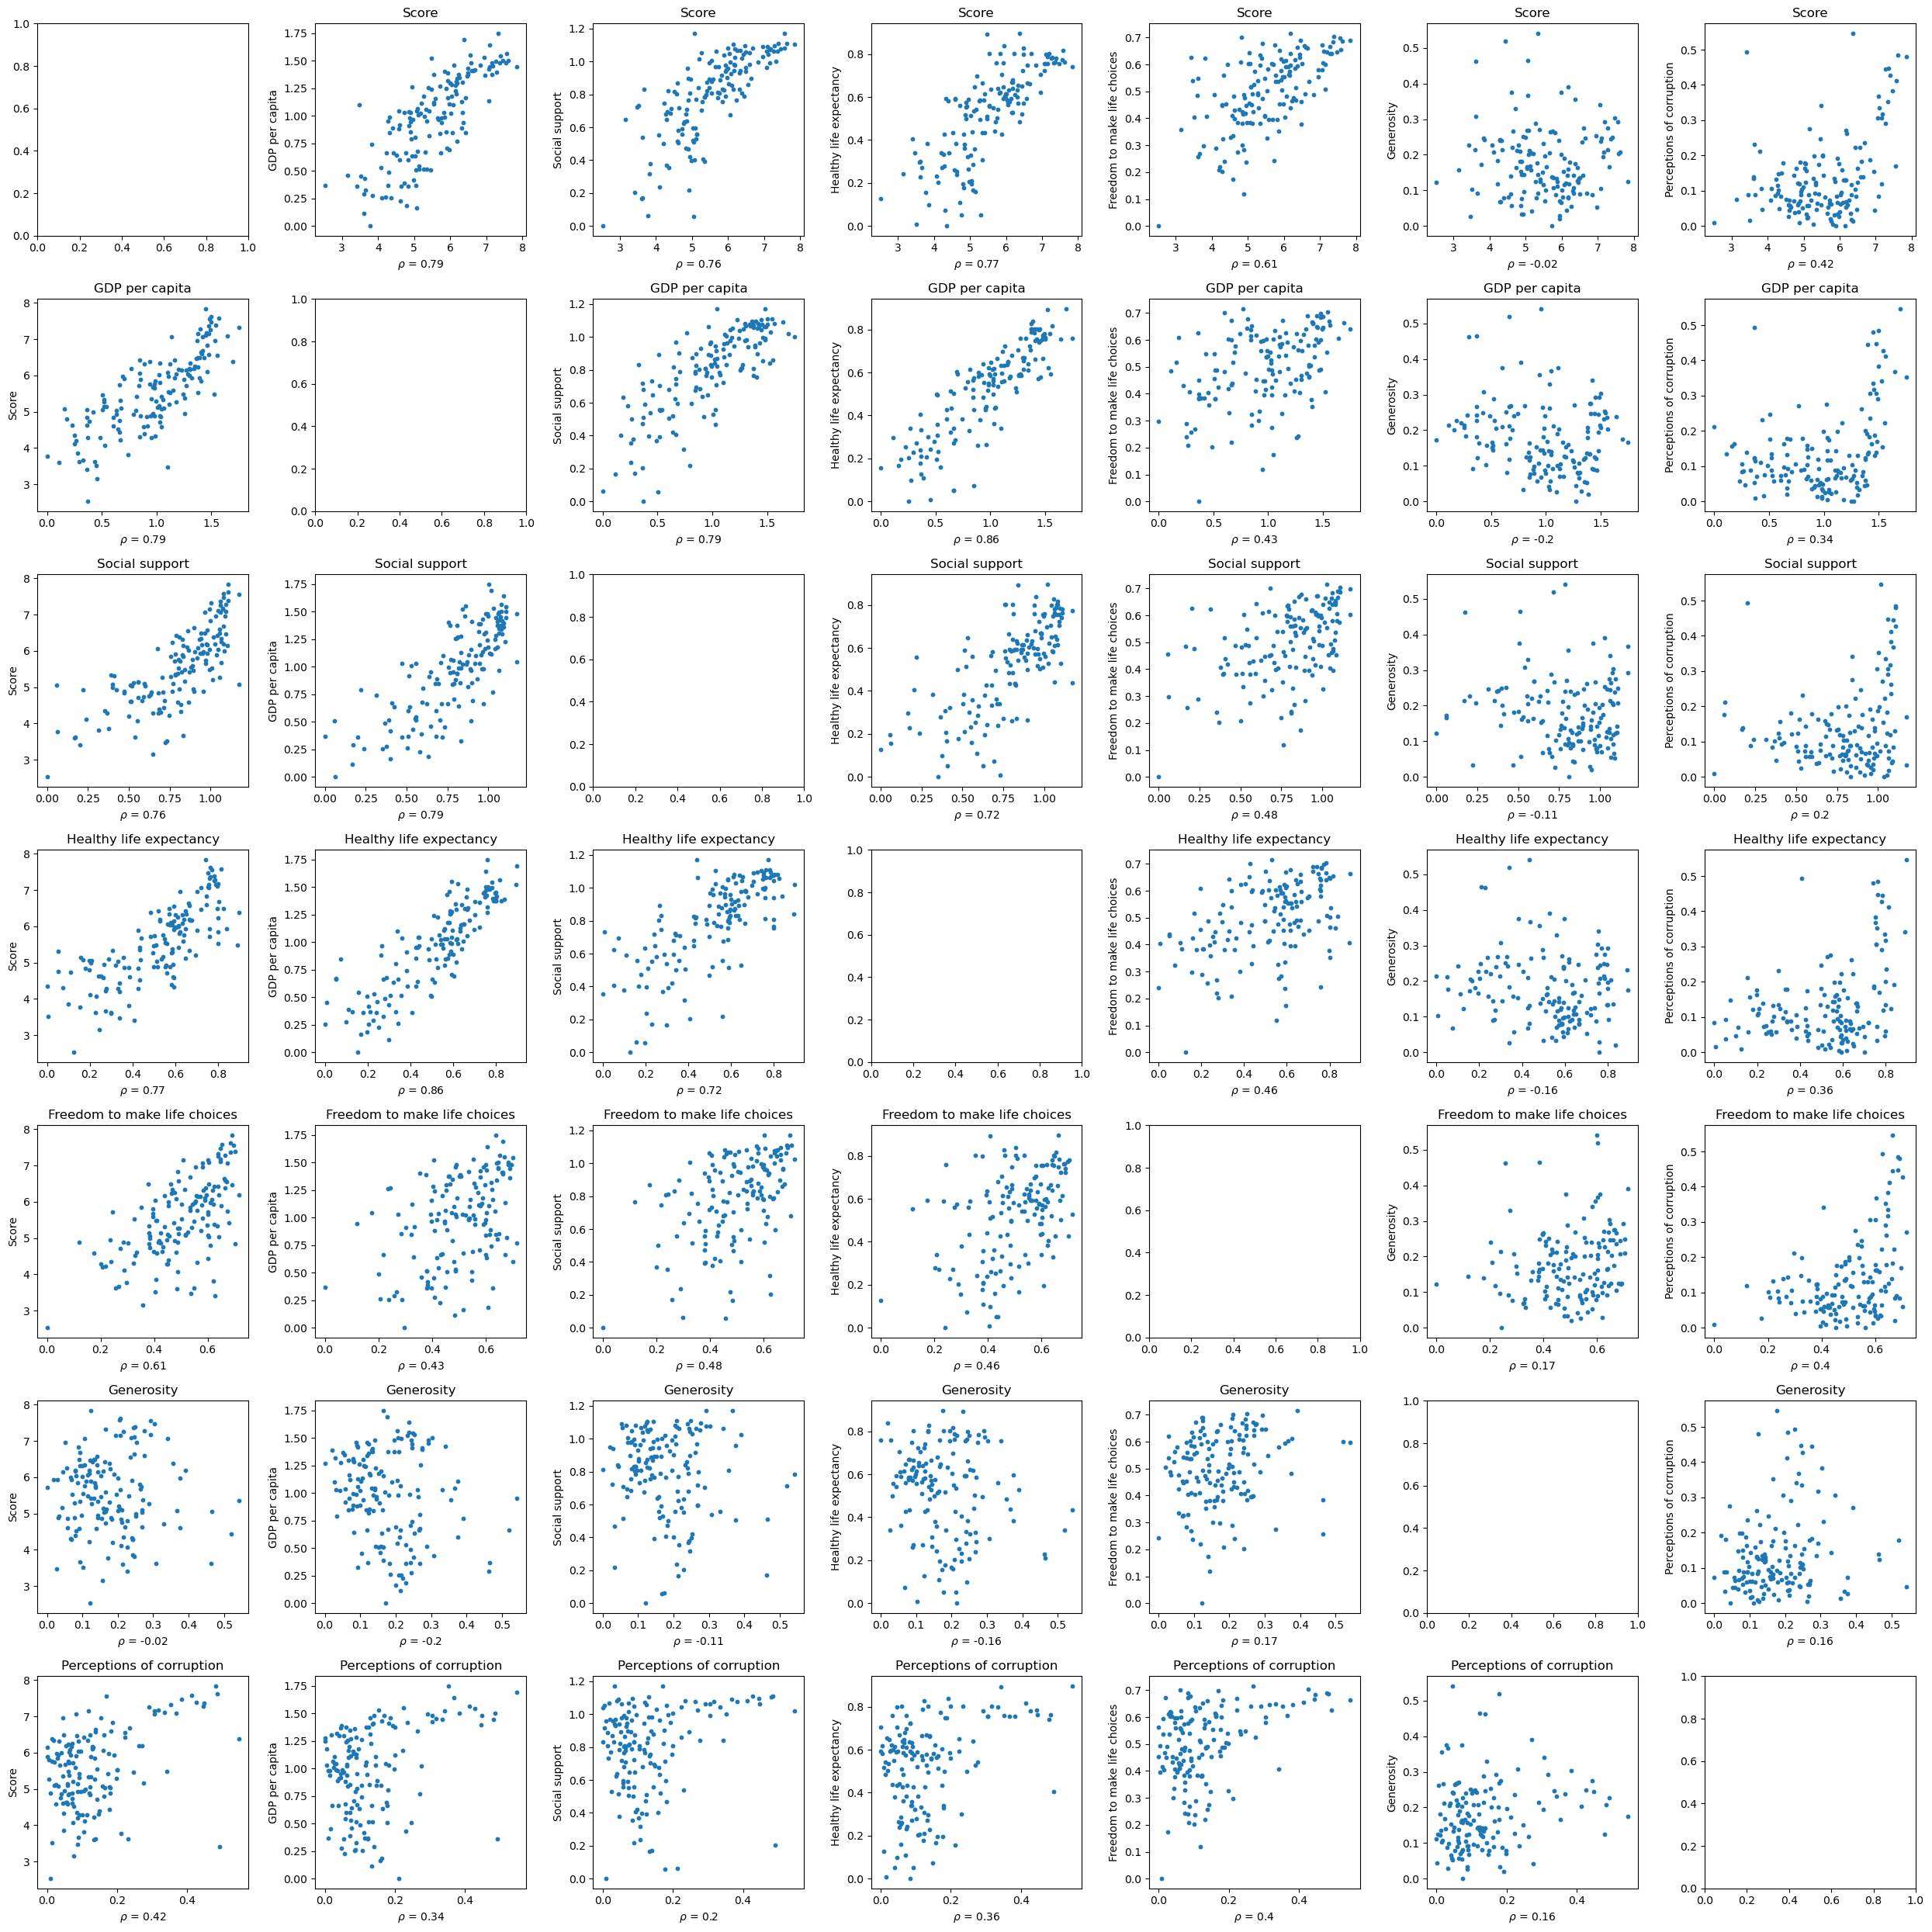

In [39]:
cols=["Score","GDP per capita","Social support", "Healthy life expectancy",
 "Freedom to make life choices","Generosity","Perceptions of corruption"]
scatterplot_matrix(cols,figsize=(25,25))

After having ran the code on many subsets of columns, I noticed that the correlation between happiness score and GDP, social support, life expectancy,and freedom to make life choices is high since the correlation values are far from 0. Meanwhile, the correlation between happiness score and generosity and perceptions of corruption are low since these correlation values are close to 0. If we wanted to create a more complex model to predict happiness, it would not be a very good idea to include these last two categories as they don't appear to be very relevant to predicting happiness.